In [94]:
import numpy as np
from utils.gradient import convolve, flip_matrix
import cv2
import matplotlib.pyplot as plt

In [17]:
def gaussian_kernel(shape, sigma):
    h, w = shape
    kernel_x = cv2.getGaussianKernel(w, sigma)
    kernel_y = cv2.getGaussianKernel(h, sigma)
    kernel = kernel_y * kernel_x.T
    kernel = kernel / np.sum(kernel)
    return kernel

In [86]:
def gaussian_blur(img, shape, sigma):
    k = gaussian_kernel(shape, sigma)
    return convolve(img, k, "same")

In [107]:
def mean_kernel(size):
    k = np.ones((size,size))
    k = k / np.sum(k)
    return k

In [108]:
def mean_blur(img, size):
    k = mean_kernel(size)
    return convolve(img, k, "same")

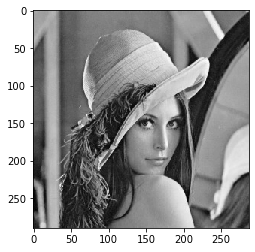

In [87]:
image = cv2.cvtColor(cv2.imread("lena.jpg"), cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap = 'gray')

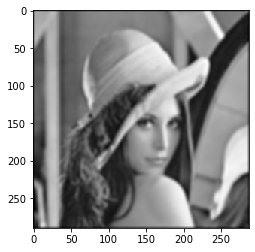

In [88]:
B = gaussian_blur(image, (7,7), 2)
plt.imshow(B, cmap = 'gray')

In [89]:
def gd_deconvolution(B, k, epochs, lr, tol = 1e-10):
    I = B.copy()
    q = k.T
    
    errors = []
    for i in range(epochs):
        
#         print(f"EPOCH : {i} I : \n{I}")
        
        val1 = convolve(I, k, "same")
        val2 = val1 - B
        del_I = convolve(val2, q, "same")
        
        if (del_I < tol).all():
            break

        I = I - lr * del_I
        
        errors.append(loss(I, k, B))
#         k = k/np.sum(k)

    plt.plot(np.arange(len(errors)), errors)
    plt.show()
        
    return I
        

In [90]:
def loss(I, k, B):
    return np.linalg.norm(convolve(I, k, "same") - B)

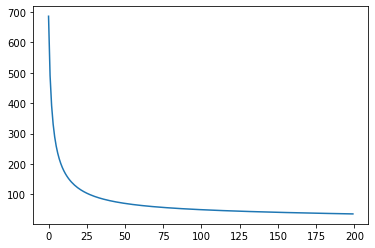

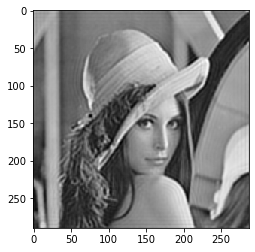

In [102]:
I_hat = gd_deconvolution(B, gaussian_kernel((7,7), 2), 200, 2)
plt.imshow(I_hat, cmap = 'gray')

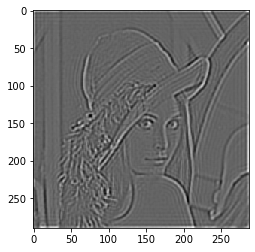

In [104]:
plt.imshow(I_hat - B, cmap = 'gray')

In [93]:
np.unique(I_hat)

array([ -6.58765428,  -6.08629287,  -3.00779923, ..., 223.43869485,
       225.30604324, 226.30792189])

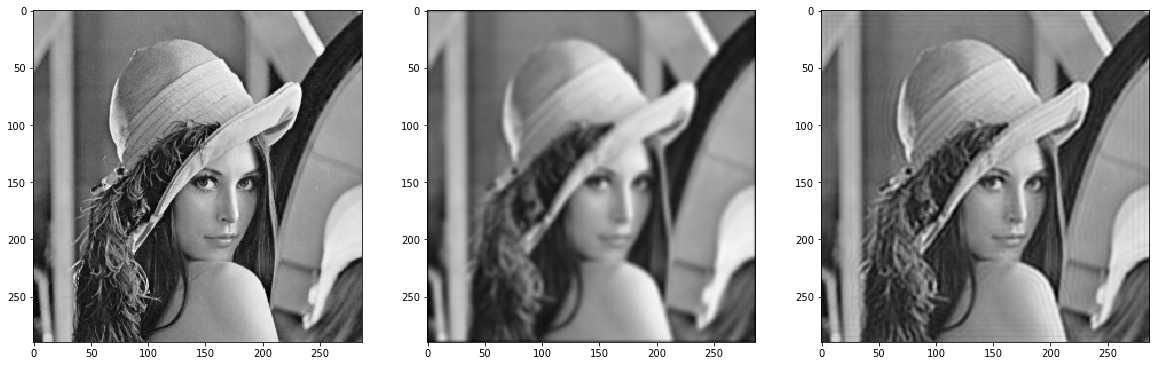

In [103]:
fig, axes = plt.subplots(1,3, figsize = (20,10))
axes[0].imshow(image, cmap = 'gray')
axes[1].imshow(B, cmap = 'gray')
axes[2].imshow(I_hat, cmap = 'gray')

In [110]:
B2 = mean_blur(image, 5)

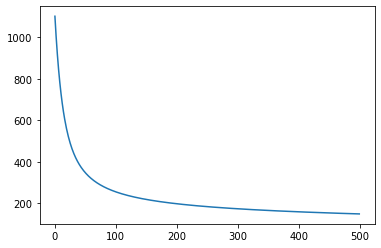

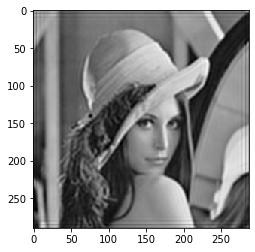

In [116]:
I_hat_2 = I_hat = gd_deconvolution(B, mean_kernel(5), 500, 0.1)
plt.imshow(I_hat_2, cmap = 'gray')

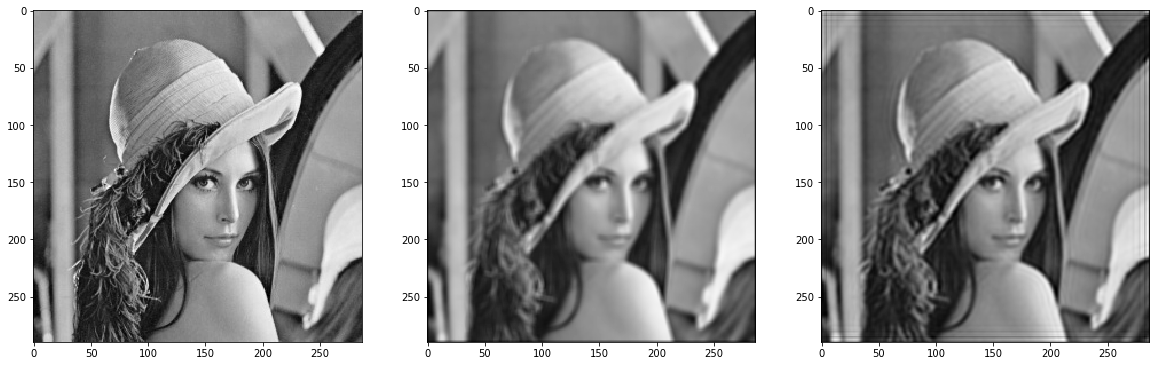

In [117]:
fig, axes = plt.subplots(1,3, figsize = (20,10))
axes[0].imshow(image, cmap = 'gray')
axes[1].imshow(B2, cmap = 'gray')
axes[2].imshow(I_hat_2, cmap = 'gray')